Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier




Data collection  and Processing

In [ ]:
# loading the csv datacto aPandas DataFrame
heart_data = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
#print first 5 rows of the dataset
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
#the number of rows and column of data set
heart_data.shape

(270, 14)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#checking for missing values
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
#statistical measure about the data
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
#checking the distribution of target variable
heart_data['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

1 --> Defective Heart
0 --> Healthy Heart

In [ ]:

x= heart_data.drop(columns= 'Thallium', axis=1)
y= heart_data['Thallium']

In [ ]:
print(x)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
print(y)

0      3
1      7
2      7
3      7
4      3
      ..
265    7
266    7
267    3
268    6
269    3
Name: Thallium, Length: 270, dtype: int64


Splitting the data into Training data & Test Data

In [ ]:
heart_data['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()


heart_data['Heart Disease'] = enc.fit_transform(heart_data['Heart Disease'])
print(heart_data[['Heart Disease', 'Heart Disease']].head())


   Heart Disease  Heart Disease
0              1              1
1              0              0
2              1              1
3              0              0
4              0              0


In [ ]:
#heart_data['Heart Disease']=heart_data['Heart Disease'].map({'Presence':1, 'Absence':0})

In [ ]:
heart_data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
label=heart_data[['Heart Disease']]
features=heart_data[['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']]

In [ ]:

xTrain, xTest, yTrain, yTest = train_test_split(features, label, test_size = 0.2, stratify= label, random_state = 1)

#minamx scaling
scaler = MinMaxScaler()

scaler.fit(xTrain)

xTrain_scaled = scaler.transform(xTrain)
xTest_scaled = scaler.transform(xTest)

print("per-feature minimum after scaling:\n {}".format(
    xTrain_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    xTrain_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# logistic Regression
model = LogisticRegression()
model.fit(xTrain_scaled, yTrain)
predictions = model.predict(xTest_scaled)
model_value = accuracy_score(yTest, predictions)
print(model_value)

# decision tree
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(xTrain_scaled,yTrain)

y_pred = clf.predict(xTest_scaled)
y_pred = clf.predict(xTest_scaled)
score=accuracy_score(y_pred,yTest)
print(score)


0.8518518518518519
0.7592592592592593


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


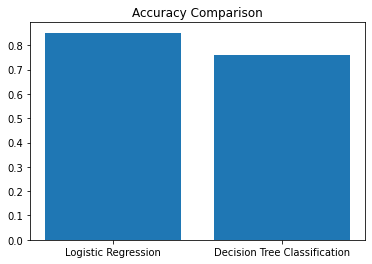

In [ ]:
plt.bar(['Logistic Regression', 'Decision Tree Classification'],[model_value, score])
plt.title('Accuracy Comparison')
plt.show()

Model training

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8703703703703703
0.7777777777777778


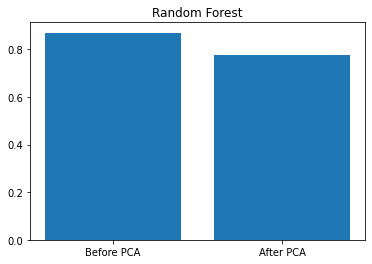

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(xTrain_scaled, yTrain)
rf_score = rf.score(xTest_scaled, yTest)
print(rf_score)

X1= heart_data.drop("Heart Disease" , axis=1)
y1= heart_data["Heart Disease"]

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
new_scaler = MinMaxScaler()
new_scaler.fit(new_X_train)

new_X_train_scaled = new_scaler.transform(new_X_train)
new_X_test_scaled = new_scaler.transform(new_X_test)

new_rf = RandomForestClassifier(n_estimators=50)
new_rf.fit(new_X_train_scaled, new_Y_train)
new_rf_score = new_rf.score(new_X_test_scaled, new_Y_test)
print(new_rf_score)
plt.bar(['Before PCA', 'After PCA'],[rf_score, new_rf_score])
plt.title('Random Forest')
plt.show()




IndentationError: ignored

Logistic regression

---



Model evaluation

Accuracy score